In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sns.set_palette('deep')

In [3]:
polydeg = '16384'
strip = 'bar : '
title = 'Barrel Shifter'
fname = 'bar'

path1 = f'{fname}/benchmark_{fname}_ModSwitch_{polydeg}.csv'   #modswitch
path2 = f'{fname}/benchmark_{fname}_noModSwitch_{polydeg}.csv' #no modswitch

In [4]:
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
raw = (df1, df2)
data = []
for d in raw:
    data.append(pd.DataFrame({'time' : d.iloc[:, 1], 'source': d.columns[1].replace(f'{strip}', '')}))
data = pd.concat(data, axis=0).reset_index(drop=True)
data['time'] = data['time'] * 1e-3

In [5]:
data

,time,source
0,2484.874,MODSWITCH
1,2429.058,MODSWITCH
2,2416.084,MODSWITCH
3,2408.688,MODSWITCH
4,2404.421,MODSWITCH
...,...,...
195,2406.249,NO MODSWITCH
196,2404.661,NO MODSWITCH
197,2402.821,NO MODSWITCH
198,2407.381,NO MODSWITCH


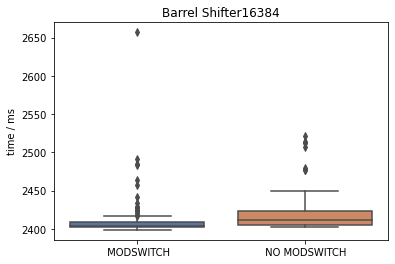

In [6]:
g = sns.boxplot(data=data, x='source', y='time')
g.set_title(title + polydeg)
g.set_xlabel('')
g.set_ylabel('time / ms')
g.figure.savefig( f'{fname}/{fname}_{polydeg}_box.jpg', transparent=False, format='jpg', bbox_inches='tight')

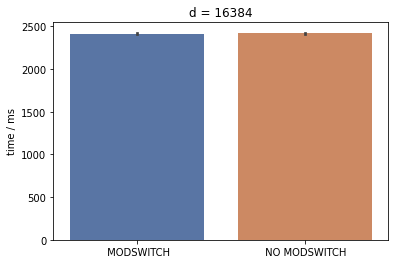

In [7]:
g = sns.barplot(data=data, x='source', y='time')
#g.set_title(title + polydeg)
g.set_title('d = ' + polydeg)
g.set_xlabel('')
g.set_ylabel('time / ms')
g.figure.savefig(f'{fname}/{fname}_{polydeg}_bar.jpg', transparent=False, format='jpg', bbox_inches='tight')

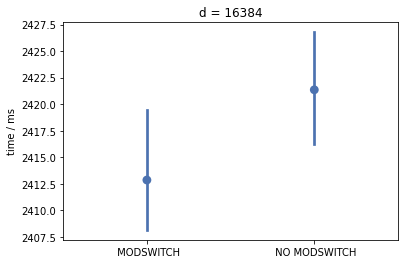

In [8]:
g = sns.pointplot(data=data, x='source', y='time', linestyles=[''])
#g.set_title(title + polydeg)
g.set_title('d = ' + polydeg)
g.set_xlabel('')
g.set_ylabel('time / ms')
g.figure.savefig(f'{fname}/{fname}_{polydeg}_point.jpg', transparent=False, format='jpg', bbox_inches='tight')